### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [4]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

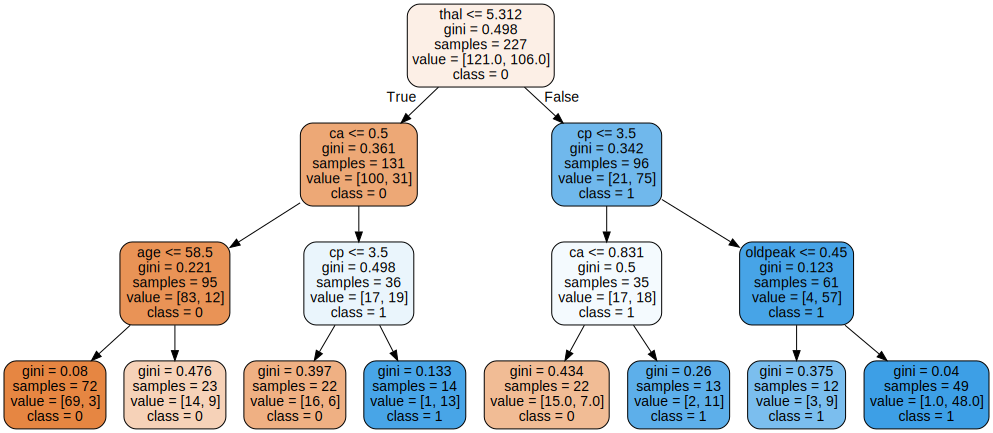

In [5]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [6]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

Decision Tree:
Best hyperparameters for Decision Tree: {'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.8068599033816426
Decision Tree f1_macro on test set: 0.8152777777777778
Decision Tree accuracy on test set: 0.8157894736842105
------------------------------
Bagged Decision Trees:
Best hyperparameters for Bagged Decision Trees: {'clf__max_features': 0.5, 'clf__max_samples': 0.7, 'clf__n_estimators': 100}
Best cross-validation accuracy for Bagged Decision Trees: 0.8418357487922705
Bagged Decision Trees f1_macro on test set: 0.7631578947368421
Bagged Decision Trees accuracy on test set: 0.7631578947368421
------------------------------
Random Forest:
Best hyperparameters for Random Forest: {'clf__max_depth': 6, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8419323671497585
Random Forest f1_macro on test set: 0.7894736842105263
Random Forest acc

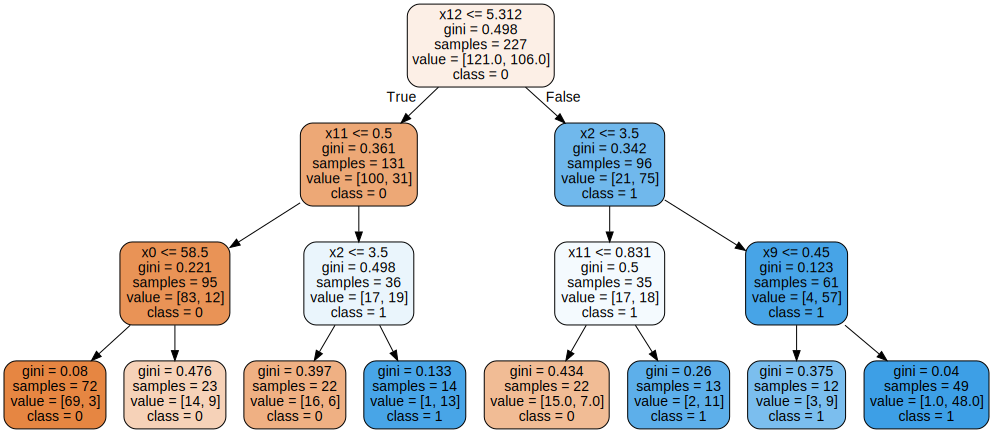


Hyperparameter explanations:
- Decision Tree:
  - Maximum depth: Controls the maximum levels in the tree to prevent overfitting.
  - Minimum samples split: The minimum number of samples required to split an internal node.
  - Minimum samples leaf: The minimum number of samples required to be at a leaf node.
- Bagged Decision Trees:
  - Number of estimators: The number of base estimators (decision trees) in the ensemble.
  - Maximum samples: The proportion of samples to draw from X to train each base estimator.
  - Maximum features: The proportion of features to draw from X to train each base estimator.
- Random Forest:
  - Number of estimators: The number of trees in the forest.
  - Maximum depth: Controls the maximum levels in each tree.
  - Minimum samples split: The minimum number of samples required to split an internal node in each tree.

Best hyperparameter values for each model:
Decision Tree: {'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Bagged

In [7]:
from sklearn.metrics import f1_score, accuracy_score

# Decision Tree
print("Decision Tree:")
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('clf', DecisionTreeClassifier())
])

dt_params = {
    'clf__max_depth': [3, 6, 9, 12],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

dt_gridcv = GridSearchCV(dt_pipeline, dt_params, scoring='accuracy', cv=5)
dt_gridcv.fit(X_train, y_train)

print("Best hyperparameters for Decision Tree:", dt_gridcv.best_params_)
print("Best cross-validation accuracy for Decision Tree:", dt_gridcv.best_score_)

dt_pred = dt_gridcv.predict(X_test)
dt_f1 = f1_score(y_test, dt_pred, average='macro')
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree f1_macro on test set:", dt_f1)
print("Decision Tree accuracy on test set:", dt_accuracy)
print("-" * 30)


# Bagged Decision Trees
print("Bagged Decision Trees:")
bagging_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('clf', BaggingClassifier(DecisionTreeClassifier()))
])

bagging_params = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_samples': [0.5, 0.7, 1.0],
    'clf__max_features': [0.5, 0.7, 1.0]
}

bagging_gridcv = GridSearchCV(bagging_pipeline, bagging_params, scoring='accuracy', cv=5)
bagging_gridcv.fit(X_train, y_train)

print("Best hyperparameters for Bagged Decision Trees:", bagging_gridcv.best_params_)
print("Best cross-validation accuracy for Bagged Decision Trees:", bagging_gridcv.best_score_)

bagging_pred = bagging_gridcv.predict(X_test)
bagging_f1 = f1_score(y_test, bagging_pred, average='macro')
bagging_accuracy = accuracy_score(y_test, bagging_pred)

print("Bagged Decision Trees f1_macro on test set:", bagging_f1)
print("Bagged Decision Trees accuracy on test set:", bagging_accuracy)
print("-" * 30)


# Random Forest
print("Random Forest:")
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('clf', RandomForestClassifier())
])

rf_params = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_depth': [3, 6, 9, 12],
    'clf__min_samples_split': [2, 5, 10]
}

rf_gridcv = GridSearchCV(rf_pipeline, rf_params, scoring='accuracy', cv=5)
rf_gridcv.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", rf_gridcv.best_params_)
print("Best cross-validation accuracy for Random Forest:", rf_gridcv.best_score_)

rf_pred = rf_gridcv.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred, average='macro')
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest f1_macro on test set:", rf_f1)
print("Random Forest accuracy on test set:", rf_accuracy)
print("-" * 30)

# Compare models and find the best one
models = {
    "Decision Tree": {"f1_macro": dt_f1, "accuracy": dt_accuracy, "best_estimator": dt_gridcv.best_estimator_},
    "Bagged Decision Trees": {"f1_macro": bagging_f1, "accuracy": bagging_accuracy, "best_estimator": bagging_gridcv.best_estimator_},
    "Random Forest": {"f1_macro": rf_f1, "accuracy": rf_accuracy, "best_estimator": rf_gridcv.best_estimator_}
}

best_model_name = None
best_accuracy = -1

for model_name, scores in models.items():
    print(f"{model_name}: f1_macro = {scores['f1_macro']:.4f}, accuracy = {scores['accuracy']:.4f}")
    if scores['accuracy'] > best_accuracy:
        best_accuracy = scores['accuracy']
        best_model_name = model_name

print(f"\nBest model based on accuracy: {best_model_name}")

# Plot the best tree model if it's a Decision Tree or Bagging with Decision Tree
if best_model_name == "Decision Tree":
    best_tree = models[best_model_name]["best_estimator"].named_steps['clf']
    plot_data = export_graphviz(best_tree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=[f'x{i}' for i in range(X_train.shape[1])], # Use generic feature names for now
                                class_names=['0', '1'])
    graph = graphviz.Source(plot_data)
    print("\nPlot of the best Decision Tree model:")
    display(graph)
elif best_model_name == "Bagged Decision Trees":
    # You might want to plot one of the trees in the bagged ensemble,
    # for simplicity, we can plot the first one if needed.
    # For now, we will skip plotting for bagged trees as it's not a single tree.
    print("\nPlotting a single tree from the Bagged Decision Trees ensemble is not straightforward.")
elif best_model_name == "Random Forest":
     # You might want to plot one of the trees in the random forest,
    # for simplicity, we can plot the first one if needed.
    # For now, we will skip plotting for random forest as it's not a single tree.
    print("\nPlotting a single tree from the Random Forest ensemble is not straightforward.")


# Explain hyperparameters
print("\nHyperparameter explanations:")
print("- Decision Tree:")
print("  - Maximum depth: Controls the maximum levels in the tree to prevent overfitting.")
print("  - Minimum samples split: The minimum number of samples required to split an internal node.")
print("  - Minimum samples leaf: The minimum number of samples required to be at a leaf node.")
print("- Bagged Decision Trees:")
print("  - Number of estimators: The number of base estimators (decision trees) in the ensemble.")
print("  - Maximum samples: The proportion of samples to draw from X to train each base estimator.")
print("  - Maximum features: The proportion of features to draw from X to train each base estimator.")
print("- Random Forest:")
print("  - Number of estimators: The number of trees in the forest.")
print("  - Maximum depth: Controls the maximum levels in each tree.")
print("  - Minimum samples split: The minimum number of samples required to split an internal node in each tree.")

print("\nBest hyperparameter values for each model:")
print("Decision Tree:", dt_gridcv.best_params_)
print("Bagged Decision Trees:", bagging_gridcv.best_params_)
print("Random Forest:", rf_gridcv.best_params_)